Epoch 1/50
384/384 [==============================] - 2s 3ms/step - loss: 0.5021 - accuracy: 0.8794 - val_loss: 0.0576 - val_accuracy: 0.9948
Epoch 2/50
384/384 [==============================] - 1s 4ms/step - loss: 0.0438 - accuracy: 0.9962 - val_loss: 0.0186 - val_accuracy: 0.9980
Epoch 3/50
384/384 [==============================] - 1s 3ms/step - loss: 0.0185 - accuracy: 0.9982 - val_loss: 0.0110 - val_accuracy: 0.9987
Epoch 4/50
384/384 [==============================] - 1s 3ms/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.0064 - val_accuracy: 0.9990
Epoch 5/50
384/384 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 6/50
384/384 [==============================] - 1s 3ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 7/50
384/384 [==============================] - 1s 3ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 

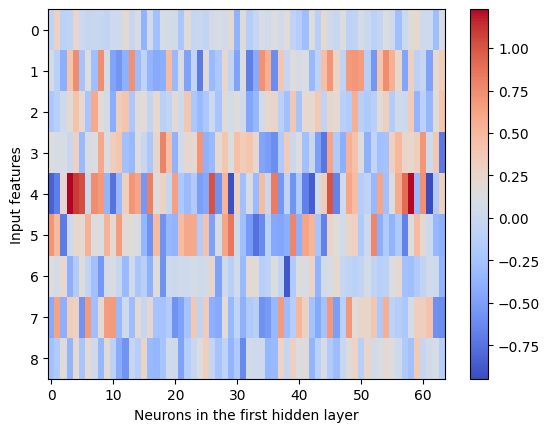

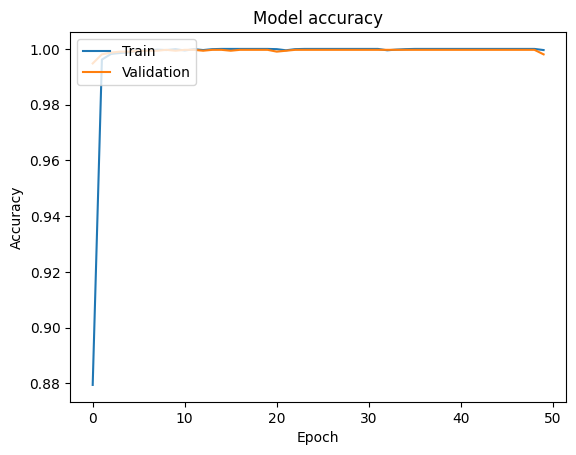

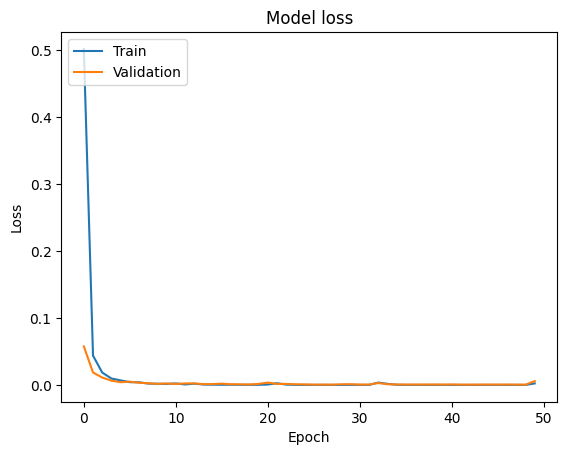

120/120 [==============================] - 0s 2ms/step


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf


# Load the CSV files
x_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/x_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/x_test.csv')

# Drop the columns 'm_power', 'Tosc', and 'Tmix'
x_train = x_train.drop(['m_power', 'Tosc', 'Tmix'], axis=1)
x_test = x_test.drop(['m_power', 'Tosc', 'Tmix'], axis=1)

# Normalize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# One-hot encode the target variable
#num_classes = len(np.unique(y_train)) 
y_train_hot = tf.keras.utils.to_categorical(y_train['target'] - 1)

# Split the data into train, validation, and test sets


x_train, x_val, y_train, y_val = train_test_split(x_train_scaled, y_train_hot, test_size=0.2, random_state=42)



# Build the model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#train the model

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
import numpy as np



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Use the trained model to predict the target variable for the test data
y_pred = model.predict(x_test)

# Get the predicted classes from the predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1) + 1

# Create a DataFrame with the predicted classes
output = pd.DataFrame({'id': np.arange(len(y_pred_classes)), 'target': y_pred_classes})

# Save the DataFrame to a CSV file
output.to_csv('submission.csv', index=False)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the CSV files
x_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/x_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/x_test.csv')

# Drop the columns 'm_power', 'Tosc', and 'Tmix'
x_train = x_train.drop(['m_power', 'Tosc', 'Tmix'], axis=1)
x_test = x_test.drop(['m_power', 'Tosc', 'Tmix'], axis=1)

# Normalize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Split the data into train, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train_scaled, y_train['target'], test_size=0.2, random_state=42)

# Train the model
svm = SVC(kernel='linear', C=10, gamma=0.05)
svm.fit(x_train, y_train)

# Evaluate the model on the validation set
val_accuracy = svm.score(x_val, y_val)
print(f"Validation accuracy: {val_accuracy}")

# Use the trained model to predict the target variable for the test data
y_pred = svm.predict(x_test)

# Save the predicted target variable to a CSV file
np.savetxt('/content/drive/MyDrive/Colab Notebooks/y_pred.csv', y_pred, delimiter=',')


Validation accuracy: 1.0
